
> # **Football Players Face Recognition**


> **Facial Recognition Dataset gathered by Mohamed Aleya, Aziz Bali and Ala Riahi**

>[https://](https://)

**Dataset Content:**

>The images were collected from Google, Pinterest and other sites. They were then cropped to fit the players' faces only. There is a total of 8 players or classes.

**Description:**
>The code unzips the dataset and splits it into the training and validation sets based on the given ratio. Transfer Learning has been implemented with the MobileNetV2 model and imagenet weights. The pre-trained model consists of 155 layers and the whole layers of the pretrained model is retrained to get a better accuracy. Image Augmentation has been implemented to avoid the overfitting of the model. The model has been trained for the 30 epochs and the Validation Accuracy of 95% has been yielded.

Note: The model performs well on cropped images.





In [2]:
# Move the downloaded the zipfile of dataset into the current working directory or modify the path in the code to the location of the downloaded dataset.
import os
from zipfile import ZipFile
work_dir = os.getcwd()                                                  #Saves the current working directory.
with ZipFile(os.path.join(work_dir ,'fifa_player_dataset.zip'),'r') as zipobject:
  zipobject.extractall()                                                #Unzip the downloaded dataset.s

In [3]:
train_dir = os.path.join(work_dir,'train')       #Path of train directory. 
test_dir = os.path.join(work_dir,'test')         #Path of test directory.
os.makedirs(train_dir, exist_ok=True)  #Creating a directory for training examples. 
os.makedirs(test_dir, exist_ok=True)   #Creating a directory for testing examples. 

In [4]:
train_ratio=0.8
test_ratio=0.2
dir_list=os.listdir(os.path.join(work_dir ,'fifa_player_dataset'))
print('The Number of Classes in the Dataset is:{}'.format(len(dir_list)))

The Number of Classes in the Dataset is:8


In [5]:
#This Code will split up the unzipped dataset into training and testing set with respect to the values of train_ratio and test_ratio.
from shutil import copyfile
import numpy as np

source_dir = os.path.join(work_dir ,'fifa_player_dataset')        #Unzipped dataset directory 

dir_list = os.listdir(source_dir)

for folder in dir_list:
    data_dir = os.listdir(os.path.join(source_dir,folder))
    np.random.shuffle(data_dir)                            #Shuffling the examples of the classes inside the dataset.
    os.makedirs(os.path.join(train_dir , folder), exist_ok=True)
    os.makedirs(os.path.join(test_dir , folder), exist_ok=True)
    train_data = data_dir[:int(len(data_dir)*train_ratio+1)] #Splitting the training dataset with respect to the train_ratio.
    test_data = data_dir[-int(len(data_dir)*test_ratio):]
  
    for image in train_data:
        copyfile(os.path.join(source_dir,folder,image) , os.path.join(train_dir,folder,image)) #Copying the Training files from dataset to training directory.
    
    for image in test_data:
       copyfile(os.path.join(source_dir,folder,image) , os.path.join(test_dir,folder,image))  #Copying the Training files from dataset to training directory.
    

In [6]:

print("The Number of Classes in the Training Set:{}".format(len(os.listdir(train_dir))))
print("The Number Of Classes in the Testing Set:{}".format(len(os.listdir(test_dir))))
print('For Verification of the Split.....')
print("The Number of Examples in the Class='Cristiano Ronaldo' in the Dataset Directory:{}".format(len(os.listdir(os.path.join(source_dir,'Cristiano Ronaldo')))))
print("The Number of Examples in the Class='Cristiano Ronaldo' in the Train Directory:{}".format(len(os.listdir(os.path.join(train_dir,'Cristiano Ronaldo')))))
print("The Number of Examples in the Class='Cristiano Ronaldo' in the Test Directory:{}".format(len(os.listdir(os.path.join(test_dir,'Cristiano Ronaldo')))))


The Number of Classes in the Training Set:8
The Number Of Classes in the Testing Set:8
For Verification of the Split.....
The Number of Examples in the Class='Cristiano Ronaldo' in the Dataset Directory:301
The Number of Examples in the Class='Cristiano Ronaldo' in the Train Directory:241
The Number of Examples in the Class='Cristiano Ronaldo' in the Test Directory:60


In [7]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
rows=160  #Number of Pixels in the Rows for Input. 
cols=160  #Number of Pixels in Columns for Output

In [8]:
trained_model=MobileNetV2(input_shape=(rows,cols,3),           
                    include_top=False,
                    weights='imagenet')   


trained_model.trainable=True  #Un-Freeze all the pretrained layers of 'MobileNetV2 for Training.
    
trained_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [9]:
last_layer=trained_model.get_layer('out_relu')   
last_layer_output=last_layer.output  #Saves the output of the last layer of the MobileNetV2.

In [10]:
#Callback Function which stops training when accuracy reaches 98%.
# class myCallback(tf.keras.callbacks.Callback):
#  def on_epoch_end(self, epoch, logs={}):
#    if(logs.get('accuracy') > 0.98):
#      print("\nReached 98% accuracy so cancelling training!")
#      self.model.stop_training = True
#callbacks=myCallback()

In [11]:
x = tf.keras.layers.GlobalAveragePooling2D()(last_layer_output)
#Add a Dropout layer.
x = tf.keras.layers.Dropout(0.8)(x)                      
# Add a final softmax layer for classification.
x = tf.keras.layers.Dense(8,activation='softmax')(x)

model = tf.keras.Model(trained_model.input,x) 

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
#Summary of the model.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']           

In [12]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 rotation_range=40,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1)
                                 
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(rows,cols),
                                                  class_mode='categorical')

test_generator=test_datagen.flow_from_directory(test_dir,
                                                target_size=(rows,cols),
                                                class_mode='categorical')

Found 1802 images belonging to 8 classes.
Found 446 images belonging to 8 classes.


In [13]:
result=model.fit(train_generator,
                 validation_data=test_generator,
                 epochs=30,
                 #callbacks=[callbacks],
                 verbose=1)

Epoch 1/30
57/57 [==============================] - 23s 225ms/step - loss: 2.7599 - accuracy: 0.2309 - val_loss: 3.2000 - val_accuracy: 0.1861
Epoch 2/30
57/57 [==============================] - 10s 181ms/step - loss: 1.6479 - accuracy: 0.4378 - val_loss: 4.5435 - val_accuracy: 0.1839
Epoch 3/30
57/57 [==============================] - 10s 181ms/step - loss: 1.1673 - accuracy: 0.5943 - val_loss: 3.6515 - val_accuracy: 0.2646
Epoch 4/30
57/57 [==============================] - 10s 175ms/step - loss: 0.8412 - accuracy: 0.7114 - val_loss: 3.5009 - val_accuracy: 0.2646
Epoch 5/30
57/57 [==============================] - 10s 177ms/step - loss: 0.6444 - accuracy: 0.7847 - val_loss: 3.0975 - val_accuracy: 0.3700
Epoch 6/30
57/57 [==============================] - 10s 176ms/step - loss: 0.4700 - accuracy: 0.8357 - val_loss: 2.4312 - val_accuracy: 0.4574
Epoch 7/30
57/57 [==============================] - 10s 175ms/step - loss: 0.4405 - accuracy: 0.8529 - val_loss: 2.0775 - val_accuracy: 0.5381

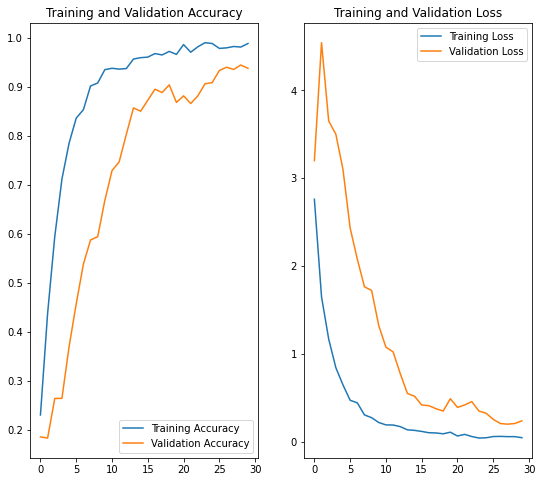

In [14]:
import matplotlib.pyplot as plt

acc = result.history['accuracy']
val_acc = result.history['val_accuracy']

loss = result.history['loss']
val_loss = result.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(9, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
loss, accuracy = model.evaluate(test_generator)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

14/14 [==============================] - 1s 58ms/step - loss: 0.2353 - accuracy: 0.9372
Loss: 0.2353249490261078
Accuracy: 0.9372197389602661


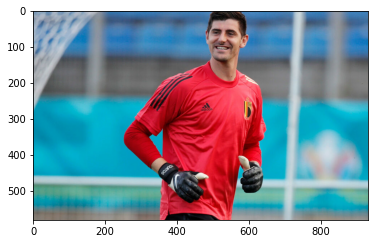

['Courtois', 'Cristiano Ronaldo', 'Dybala', 'Kross', 'Lionel Messi', 'Mohamed Salah', 'Neymar', 'Pogba']
The football player in the image is Courtois.


In [42]:
import matplotlib.image as mpimg



path="courtois3.jpg" #Path to the target image to be predicted. 

img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.show()

classes=train_generator.class_indices
class_names=list(classes.keys())   #List of the class names
img = tf.keras.preprocessing.image.load_img(
    path, target_size=(rows, cols)
)


print(class_names)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
img_array=img_array/255

score = model.predict(img_array)

print(
    "The football player in the image is \033[1m{}."
    .format(class_names[np.argmax(score)].title())
)

In [17]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10050433142662834716
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3663069184
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12101184144453857510
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]
